In [45]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("customer_booking.csv", encoding='latin1')
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [15]:
X= data.drop('booking_complete',axis=1)
y= data.booking_complete    

In [20]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,4,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,0,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,3,638,36,1,0,1,5.62


In [23]:
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [24]:
mi_scores

route                    0.054419
booking_origin           0.047296
flight_duration          0.016972
wants_extra_baggage      0.009059
length_of_stay           0.007203
purchase_lead            0.003135
wants_in_flight_meals    0.003130
wants_preferred_seat     0.002465
flight_day               0.002355
sales_channel            0.002174
num_passengers           0.002038
flight_hour              0.001172
trip_type                0.000729
Name: MI Scores, dtype: float64

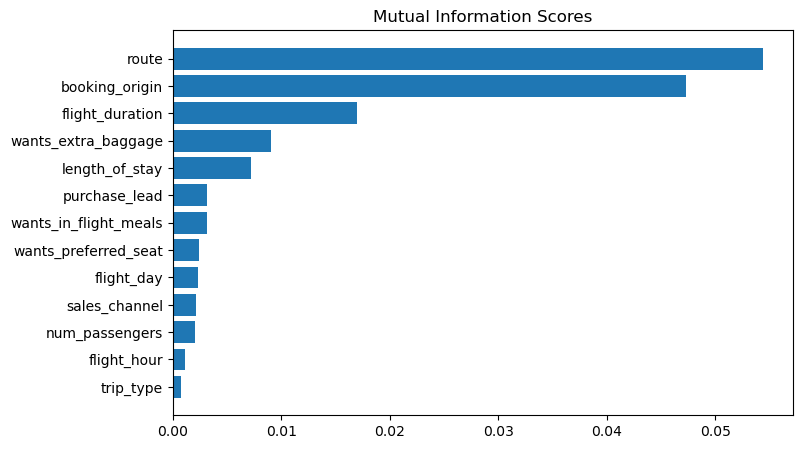

In [27]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [31]:


# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [32]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [33]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,4,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,0,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,3,638,36,1,0,1,5.62


**Random Forest with first few features which has  more imapct**

In [36]:
features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= data[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= data.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


**Random Forest with all features**

In [38]:
X= data.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= data.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


**XG Boosting with first few features which has  more imapct**

In [43]:
X= data[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= data.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671


**XG Boosting with all the features**

In [41]:
X= data.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= data.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


**Ensembling XGBoosting and RandomForest to predict**

In [49]:
# Preprocess the data
X = data.drop('booking_complete', axis=1)  # Drop target column
X = pd.get_dummies(X)  # One-hot encoding
X = scale(X)           # Feature scaling
y = data['booking_complete']  # Target variable

# Split into train and validation sets
train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Define models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
rf_model = RandomForestClassifier(random_state=1)

# Ensemble: Voting Classifier (Hard Voting)
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model)
], voting='soft')  # 'soft' uses predicted probabilities for better accuracy

# Fit the ensemble model
voting_model.fit(train_full_X, train_full_y)

# Make predictions
ensemble_preds = voting_model.predict(test_X)

# Evaluate performance
print('--- Ensemble (XGBoost + Random Forest) Results ---')
print('Accuracy: ', accuracy_score(test_y, ensemble_preds) * 100)
print('AUC Score: ', roc_auc_score(test_y, ensemble_preds))

--- Ensemble (XGBoost + Random Forest) Results ---
Accuracy:  85.22
AUC Score:  0.5463255454417241
